# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('Demo01_ajustado.csv')

X = data.drop('mau', axis=1)
y = data['mau']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensões do conjunto de treinamento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nDimensões do conjunto de validação:")
print("X_valid:", X_valid.shape)
print("y_valid:", y_valid.shape)

Dimensões do conjunto de treinamento:
X_train: (11655, 28)
y_train: (11655,)

Dimensões do conjunto de validação:
X_valid: (4995, 28)
y_valid: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

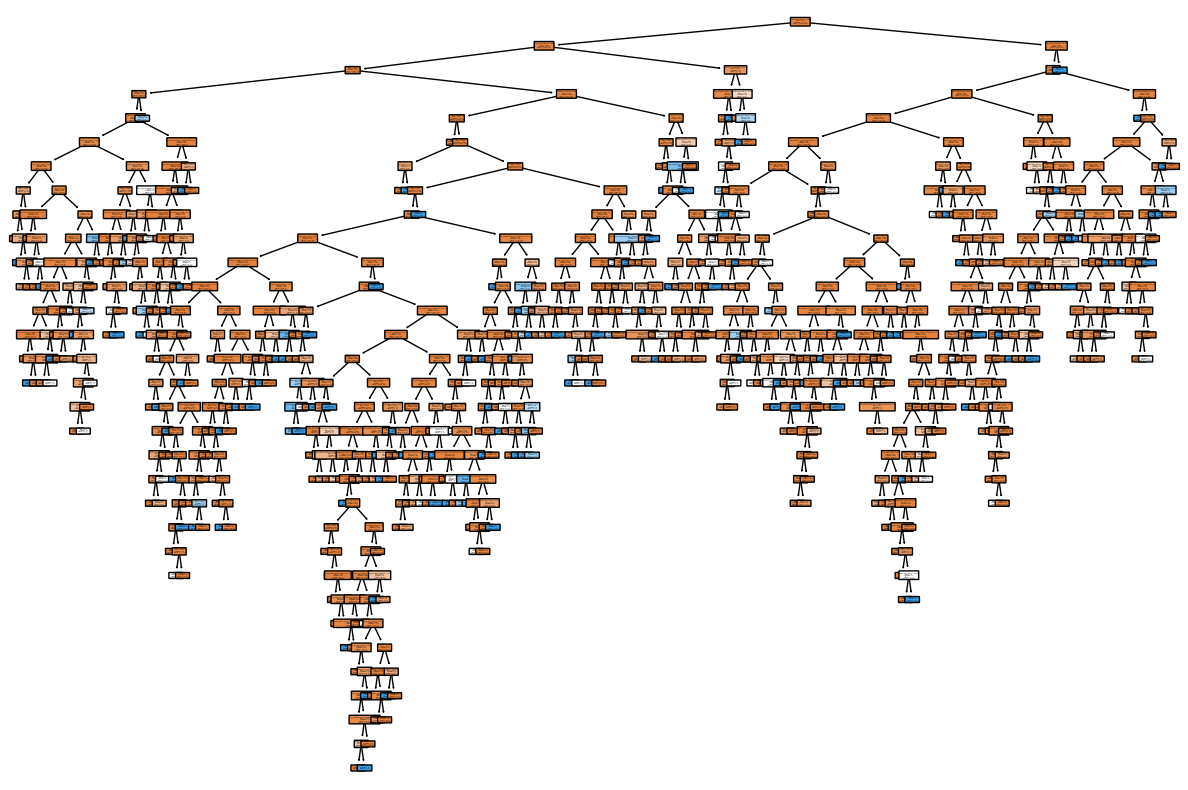

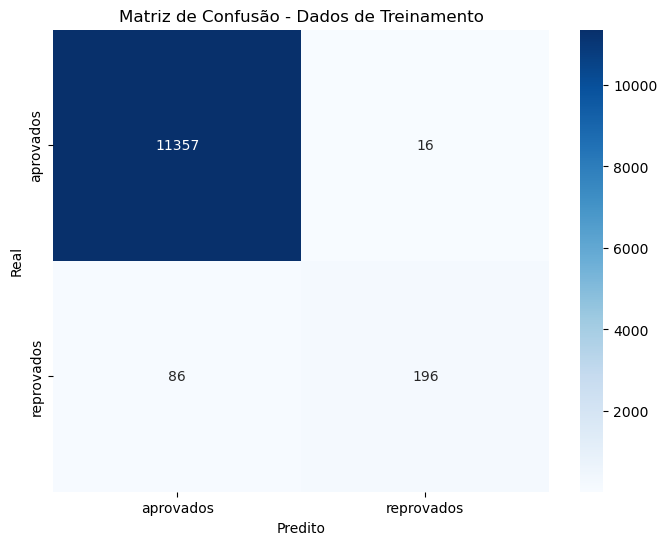

Acurácia na base de treinamento: 0.99


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

modelo_arvore = DecisionTreeClassifier(random_state=42)

modelo_arvore.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
from sklearn.tree import plot_tree

feature_names_list = X_train.columns.tolist()

plot_tree(modelo_arvore, feature_names=feature_names_list, class_names=['aprovados', 'reprovados'], filled=True, rounded=True)
plt.show()

y_pred_train = modelo_arvore.predict(X_train)
matriz_confusao = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

acuracia_treinamento = accuracy_score(y_train, y_pred_train)
print(f'Acurácia na base de treinamento: {acuracia_treinamento:.2f}')

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

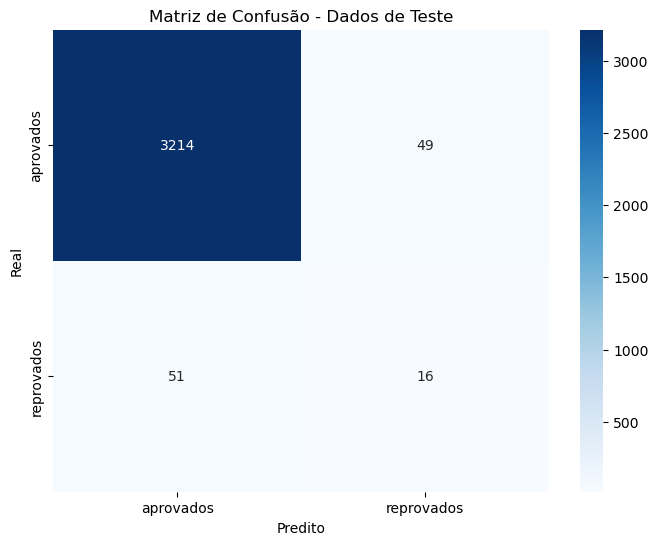

Acurácia na base de treinamento: 0.99
Acurácia na base de teste: 0.97


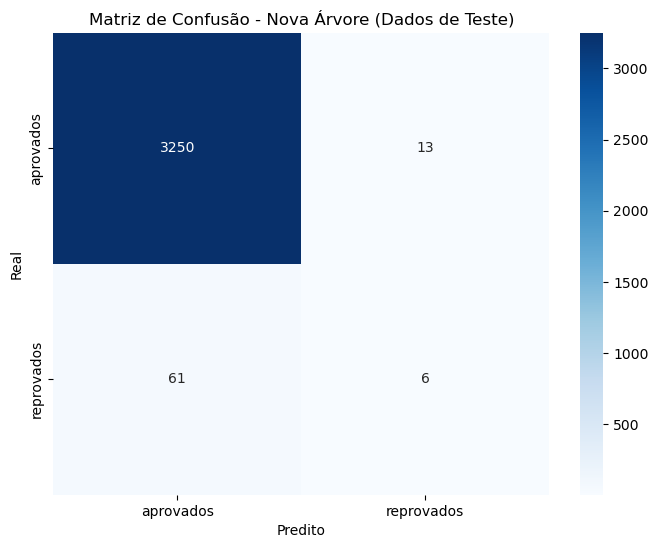

Proporção de proponentes classificados como "maus": 0.00%
Acurácia ao classificar todos os contratos como "bons": 0.00


C:\Users\fbzavarezzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:226: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred_test = modelo_arvore.predict(X_test)

matriz_confusao_teste = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_teste, annot=True, fmt="d", cmap="Blues", xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.title('Matriz de Confusão - Dados de Teste')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

acuracia_teste = accuracy_score(y_test, y_pred_test)
print(f'Acurácia na base de treinamento: {acuracia_treinamento:.2f}')
print(f'Acurácia na base de teste: {acuracia_teste:.2f}')

modelo_arvore_nova = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_arvore_nova.fit(X_train, y_train)

y_pred_nova = modelo_arvore_nova.predict(X_test)
matriz_confusao_nova = confusion_matrix(y_test, y_pred_nova)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_nova, annot=True, fmt="d", cmap="Blues", xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.title('Matriz de Confusão - Nova Árvore (Dados de Teste)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

proporcao_maus = sum(1 for predicao in y_pred_nova if predicao == 'maus') / len(y_pred_nova)
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.2%}')

acuracia_todos_bons = accuracy_score(y_test, ['bons'] * len(y_test))
print(f'Acurácia ao classificar todos os contratos como "bons": {acuracia_todos_bons:.2f}')